In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import skew, kurtosis
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn.linear_model import Ridge 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score , recall_score

In [2]:
df = pd.read_csv(r'C:\Users\arjun\OneDrive\Desktop\Dowloads from AI\iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
df['variety'].value_counts() #balanced dataset

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [4]:
df.shape

(150, 5)

### Exploratory Data Analysis

In [5]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


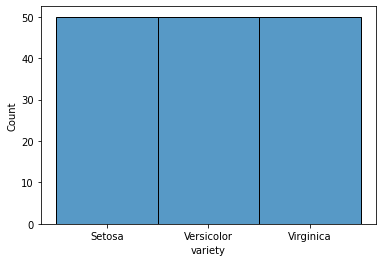

In [6]:
sns.histplot(df['variety'],kde = False ,bins = 3)
plt.show()

In [7]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

### Encoding the target variable ie convert it to numeric type

"Setosa": 0 <br>
"Versicolor" : 1 <br>
"Virginica" : 2 <br>

In [8]:
dict_1 = {"Setosa": 0, "Versicolor" : 1, "Virginica" : 2}
df['variety'] = df['variety'].map(dict_1)

In [9]:
df['variety'].value_counts() 

0    50
1    50
2    50
Name: variety, dtype: int64

In [10]:
df.groupby('variety').mean()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [11]:
features  = df.drop('variety', axis=1)

#### Categorical plot

Observations:-<br>
Virginica has highest sepal length, petal length and petal width <br> 
Setosa has lowest sepal length, petal length and petal width <br>

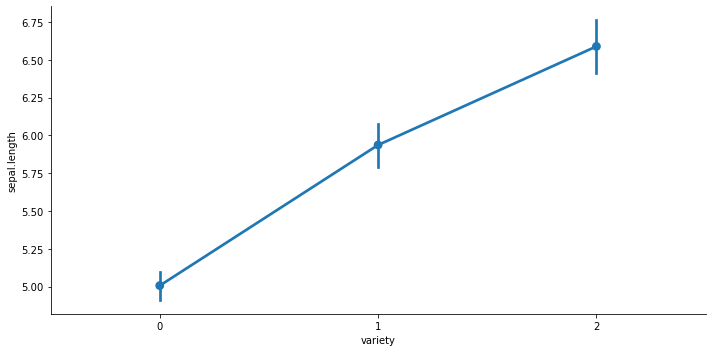

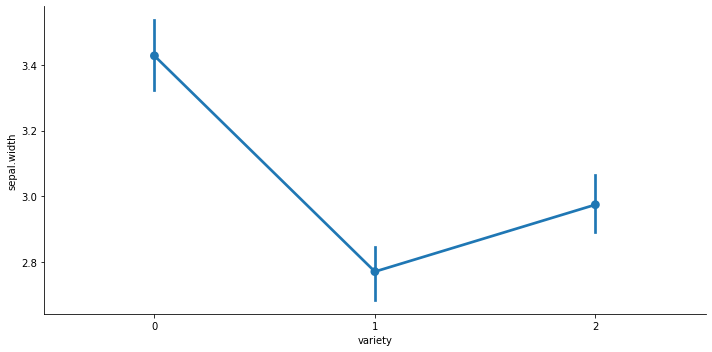

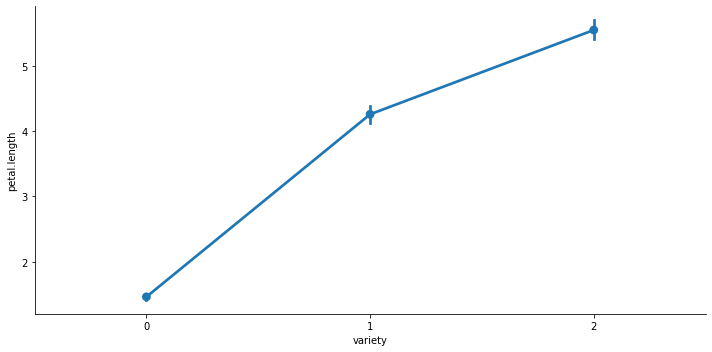

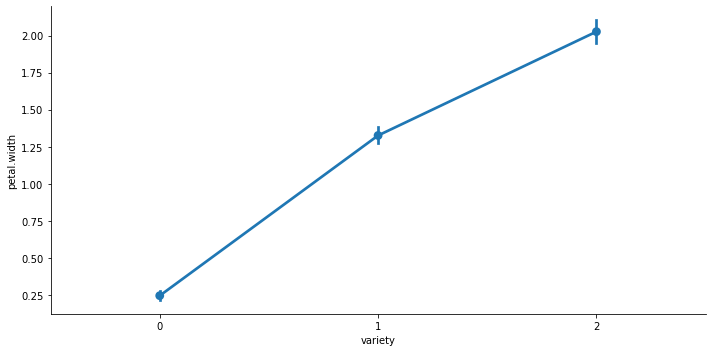

In [12]:
for i in features.columns:
    sns.catplot(x = 'variety' , y = i , data =df , kind = 'point', aspect = 2)

#### Checking Skewness and kurtosis

In [16]:
df.skew() 

sepal.length    0.314911
sepal.width     0.318966
petal.length   -0.274884
petal.width    -0.102967
variety         0.000000
dtype: float64

In [17]:
df.kurtosis()

sepal.length   -0.552064
sepal.width     0.228249
petal.length   -1.402103
petal.width    -1.340604
variety        -1.510135
dtype: float64

#### Distribution of data (Histogram)

Observations:-<br>
Sepal width is normally distributed<br>
Petal length and Petal width has skewness<br>

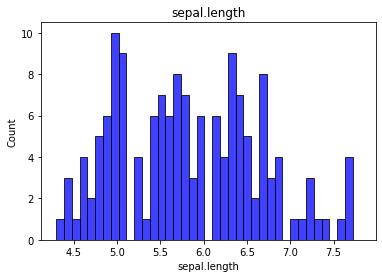

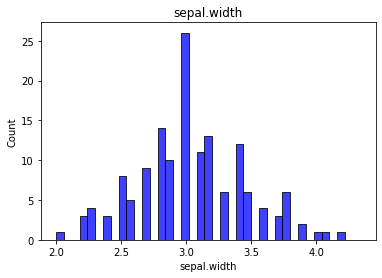

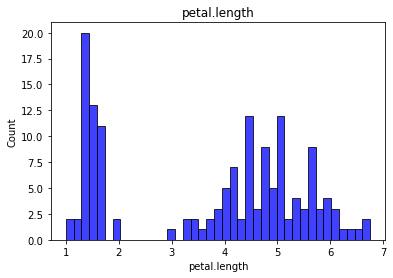

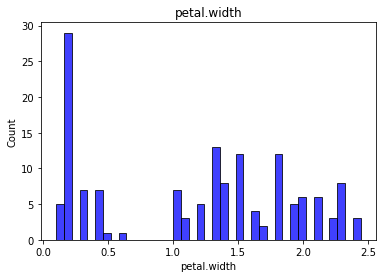

In [15]:
for i in features.columns:
    xmin = min(df[i])
    xmax = max(df[i])
    width = (xmax - xmin)/40 
    sns.histplot(df[i], color = 'b' , kde = False,bins = np.arange(xmin,xmax,width))
    plt.title(i)
    plt.show()

#### Finding Outliers

#### Using box plot to visually detect an outlier in data

Only sepal width has outliers

C:\Users\arjun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal.width'>

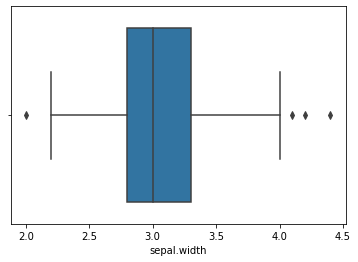

In [18]:
sns.boxplot(df['sepal.width']) # outliers found

C:\Users\arjun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal.width'>

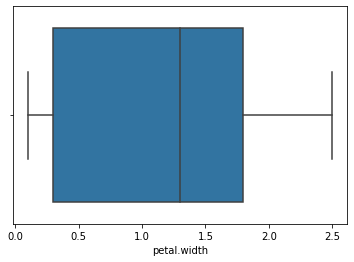

In [19]:
sns.boxplot(df['petal.width'])

C:\Users\arjun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal.length'>

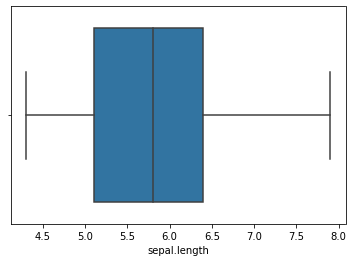

In [20]:
sns.boxplot(df['sepal.length'])

C:\Users\arjun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal.length'>

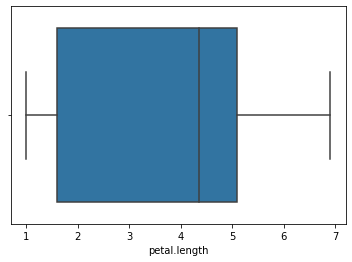

In [21]:
sns.boxplot(df['petal.length'])

### Removing outliers 

In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

sepal.length    1.3
sepal.width     0.5
petal.length    3.5
petal.width     1.5
variety         2.0
dtype: float64


In [23]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] #removing outlier 

In [24]:
df.shape

(146, 5)

#### HeatMap

#### Using heatmap to plot the correlation between target variable and independent variables

<AxesSubplot:>

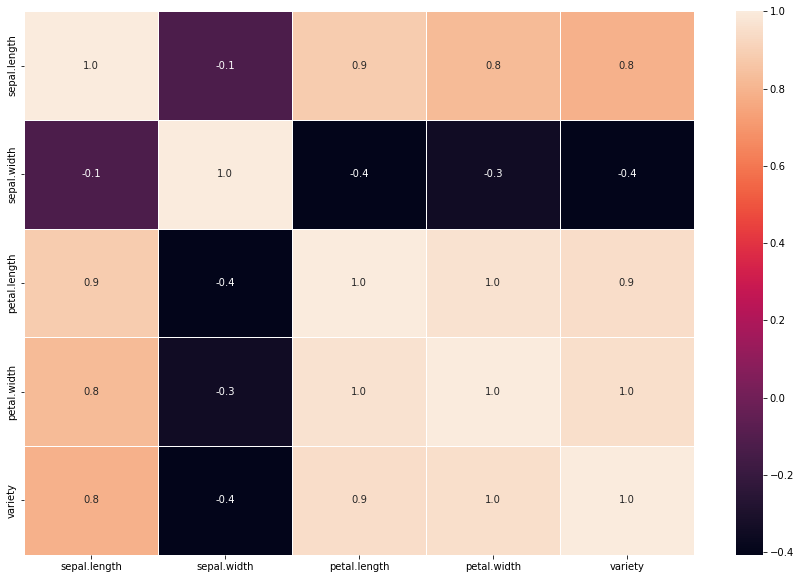

In [25]:
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [26]:
df.drop(['petal.length'],axis=1,inplace=True) #dropping petal length to avoid multi-collinearity in model

In [27]:
features = df.drop('variety',axis=1)
labels = df['variety']

### Spliting dataset into 60:20:20 ratio

In [28]:
#stratify is used split data in equal proportion
#Splitting dataset into test and train
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.4,random_state = 42, stratify = labels ) 


In [29]:
#stratify is used split data in equal proportion
#Splitting dataset into test and validation
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size=0.5, random_state=42, stratify = y_test)

### Modelling - 60:20:20 - Train -validation-test data

#### Ridge Regression

In [30]:
# Evaluation metrics is neg_mean_squared_error
model = Ridge()
folds = StratifiedKFold(n_splits = 5)
score = cross_val_score(model,x_train,y_train,cv=folds)
print(score)
print(np.mean(score))

[0.95226487 0.91476446 0.95584461 0.9269445  0.91084736]
0.9321331575653614


#### Random Forest Classifier

In [31]:
model_1 = RandomForestClassifier()
folds = StratifiedKFold(n_splits = 5)
score = cross_val_score(model_1,x_train,y_train,cv=folds)
print(score)
print(np.mean(score))

[1.         1.         1.         0.88235294 0.94117647]
0.9647058823529411


#### SVM

In [32]:
model_2 = SVC()
folds = StratifiedKFold(n_splits = 5)
score = cross_val_score(model_2,x_train,y_train,cv=folds)
print(score)
print(np.mean(score))

[0.94444444 0.88888889 0.94117647 0.88235294 0.88235294]
0.907843137254902


### Hyperparameter testing

#### Random Forest Classifier

In [33]:
model_1 = RandomForestClassifier()
folds = StratifiedKFold(n_splits = 5)
parameters = {
    'n_estimators' : [5,50,100],
    'max_depth' : [2,10,20, None]
}

cv = GridSearchCV(model_1, parameters , cv = folds)
cv.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 10, 20, None],
                         'n_estimators': [5, 50, 100]})

In [34]:
print(cv.best_params_)
print(cv.best_score_)

{'max_depth': 10, 'n_estimators': 50}
0.95359477124183


#### SVC

In [35]:
model_2 = SVC()
folds = StratifiedKFold(n_splits = 5)
parameters = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

svc = GridSearchCV(model_2, parameters , cv = folds)
svc.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [36]:
print(svc.best_params_)
print(svc.best_score_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.9764705882352942


#### Ridge Regression

In [37]:
ridge = Ridge()
folds = StratifiedKFold(n_splits = 5)
parameters = {
    'alpha' : [1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
}

csa = GridSearchCV(ridge,parameters,cv=folds)
csa.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 10, 20, 30, 35, 40, 45, 50, 55, 100]})

In [38]:
print(csa.best_params_)
print(csa.best_score_)

{'alpha': 0.01}
0.9323076743623219


### Training Models on hyperparameters

In [39]:
rfc = RandomForestClassifier(max_depth=10, n_estimators=50)
rfc.fit(x_train,y_train)


RandomForestClassifier(max_depth=10, n_estimators=50)

In [40]:
SVC = SVC(C=1, gamma= 1, kernel= 'rbf')
SVC.fit(x_train,y_train)

SVC(C=1, gamma=1)

In [41]:
ridge = Ridge(alpha = 0.01)
ridge.fit(x_train,y_train)

Ridge(alpha=0.01)

###  Model Evaluation on validation dataset

Evaluation Metrics for Random Forest Classifier and SVC : <br>
Accuracy, Precision, Recall <br>
<br>
Evaluation Metrics for Ridge regression : <br>
Mean absolute error, Root mean squared error,R^2 score <br>

In precision_score and recall_score :<br>
(average = None) this is done to check precision and recall of individual class

In [42]:
for models in [rfc,SVC]:
    y_pred = models.predict(x_val)
    accuracy = round(accuracy_score(y_val,y_pred),3)
    precision = np.round(precision_score(y_val,y_pred,average=None),3)
    recall = np.round((recall_score(y_val,y_pred, average=None)),3)
    print("Model : {} ---> Accuracy : {} , Precision = {} , Recall = {}".format(models,accuracy,precision,recall))
    print()

Model : RandomForestClassifier(max_depth=10, n_estimators=50) ---> Accuracy : 0.966 , Precision = [1.    0.909 1.   ] , Recall = [1.  1.  0.9]

Model : SVC(C=1, gamma=1) ---> Accuracy : 0.931 , Precision = [1.  0.9 0.9] , Recall = [1.  0.9 0.9]



In [43]:
for models in [ridge]:
    y_pred = models.predict(x_val)
    rmse = round(math.sqrt(mean_squared_error(y_val, y_pred)),3)
    mae = round(mean_absolute_error(y_val, y_pred),3)
    r2  = round(r2_score(y_val, y_pred),3)
    print("Model : {} ---> MAE : {} , RMSE = {} , r2 = {}".format(models,mae,rmse,r2))
    print()

Model : Ridge(alpha=0.01) ---> MAE : 0.168 , RMSE = 0.227 , r2 = 0.921



### Model Evaluation on test dataset

In [44]:
for models in [rfc,SVC]:
    y_pred = models.predict(x_test)
    accuracy = round(accuracy_score(y_test,y_pred),3)
    precision = np.round(precision_score(y_test,y_pred, average=None),3)
    recall = np.round((recall_score(y_test,y_pred, average=None)),3)
    print("Model : {} ---> Accuracy : {} , Precision = {} , Recall = {}".format(models,accuracy,precision,recall))
    print()

Model : RandomForestClassifier(max_depth=10, n_estimators=50) ---> Accuracy : 0.9 , Precision = [1.    0.818 0.889] , Recall = [1.  0.9 0.8]

Model : SVC(C=1, gamma=1) ---> Accuracy : 0.9 , Precision = [1.    0.818 0.889] , Recall = [1.  0.9 0.8]



In [45]:
for models in [ridge]:
    y_pred = models.predict(x_test)
    rmse = round(math.sqrt(mean_squared_error(y_test, y_pred)),3)
    mae = round(mean_absolute_error(y_test, y_pred),3)
    r2  = round(r2_score(y_test, y_pred),3)
    print("Model : {} ---> MAE : {} , RMSE = {} , r2 = {}".format(models,mae,rmse,r2))
    print()

Model : Ridge(alpha=0.01) ---> MAE : 0.23 , RMSE = 0.286 , r2 = 0.877



###  Conclusion 1

Best Model (as per (60:20:20) split) - Random Forest Classifier <Br> Random Forest Classifier models average accuracy for validation and test dataset is better than SVC and Ridge regression

### Modelling - 80:10:10 - Train -validation-test data

In [46]:
#stratify is used split data in equal proportion
#Splitting dataset into test and train
x_train1,x_test1,y_train1,y_test1 = train_test_split(features,labels,test_size=0.8,random_state = 42, stratify = labels ) 


In [47]:
#stratify is used split data in equal proportion
#Splitting dataset into test and validation
x_val1,x_test1,y_val1,y_test1 = train_test_split(x_test1,y_test1,test_size=0.5, random_state=42, stratify = y_test1)

#### Ridge Regression

In [48]:
# Evaluation metrics is neg_mean_squared_error
model = Ridge()
folds = StratifiedKFold(n_splits = 5)
score = cross_val_score(model,x_train1,y_train1,cv=folds)
print(score)
print(np.mean(score))

[0.91625317 0.90101083 0.8442694  0.93340846 0.98422081]
0.9158325331065363


#### Random Forest Classifier

In [49]:
model_1 = RandomForestClassifier()
folds = StratifiedKFold(n_splits = 5)
score = cross_val_score(model_1,x_train1,y_train1,cv=folds)
print(score)
print(np.mean(score))

[0.83333333 1.         1.         1.         1.        ]
0.9666666666666668


#### SVM

In [52]:
model_2 = SVC()
folds = StratifiedKFold(n_splits = 5)
score = cross_val_score(model_2,x_train1,y_train1,cv=folds)
print(score)
print(np.mean(score))

[1.         0.66666667 0.66666667 0.83333333 1.        ]
0.8333333333333333


### Hyperparameter testing

#### Random Forest Classifier

In [53]:
model_1 = RandomForestClassifier()
folds = StratifiedKFold(n_splits = 5)
parameters = {
    'n_estimators' : [5,50,100],
    'max_depth' : [2,10,20, None]
}

cv = GridSearchCV(model_1, parameters , cv = folds)
cv.fit(x_train1,y_train1)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 10, 20, None],
                         'n_estimators': [5, 50, 100]})

In [54]:
print(cv.best_params_)
print(cv.best_score_)

{'max_depth': 2, 'n_estimators': 50}
0.9666666666666668


#### SVM

In [55]:
model_2 = SVC()
folds = StratifiedKFold(n_splits = 5)
parameters = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

svc = GridSearchCV(model_2, parameters , cv = folds)
svc.fit(x_train1,y_train1)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [56]:
print(svc.best_params_)
print(svc.best_score_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.9666666666666668


#### Ridge Regression

In [57]:
ridge = Ridge()
folds = StratifiedKFold(n_splits = 5)
parameters = {
    'alpha' : [1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
}

csa = GridSearchCV(ridge,parameters,cv=folds)
csa.fit(x_train1,y_train1)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 10, 20, 30, 35, 40, 45, 50, 55, 100]})

In [58]:
print(csa.best_params_)
print(csa.best_score_)

{'alpha': 0.01}
0.9171659573583163


### Model Training

In [59]:
rfc = RandomForestClassifier(max_depth=2, n_estimators=50)
rfc.fit(x_train1,y_train1)


RandomForestClassifier(max_depth=2, n_estimators=50)

In [60]:
SVC = SVC(C=10, gamma= 1, kernel= 'rbf')
SVC.fit(x_train1,y_train1)

SVC(C=10, gamma=1)

In [61]:
ridge = Ridge(alpha = 0.01)
ridge.fit(x_train1,y_train1)

Ridge(alpha=0.01)

### Model Evaluation on validation dataset

In [62]:
for models in [rfc,SVC]:
    y_pred = models.predict(x_val1)
    accuracy = round(accuracy_score(y_val1,y_pred),3)
    precision = np.round(precision_score(y_val1,y_pred,average=None),3)
    recall = np.round((recall_score(y_val1,y_pred, average=None)),3)
    print("Model : {} ---> Accuracy : {} , Precision = {} , Recall = {}".format(models,accuracy,precision,recall))
    print()

Model : RandomForestClassifier(max_depth=2, n_estimators=50) ---> Accuracy : 0.948 , Precision = [1.    0.864 1.   ] , Recall = [1.   1.   0.85]

Model : SVC(C=10, gamma=1) ---> Accuracy : 0.931 , Precision = [1.    0.857 0.947] , Recall = [0.947 0.947 0.9  ]



In [63]:
for models in [ridge]:
    y_pred = models.predict(x_val1)
    rmse = round(math.sqrt(mean_squared_error(y_val1, y_pred)),3)
    mae = round(mean_absolute_error(y_val1, y_pred),3)
    r2  = round(r2_score(y_val1, y_pred),3)
    print("Model : {} ---> MAE : {} , RMSE = {} , r2 = {}".format(models,mae,rmse,r2))
    print()

Model : Ridge(alpha=0.01) ---> MAE : 0.19 , RMSE = 0.243 , r2 = 0.912



### Model Evaluation on test dataset

In [64]:
for models in [rfc,SVC]:
    y_pred = models.predict(x_test1)
    accuracy = round(accuracy_score(y_test1,y_pred),3)
    precision = np.round(precision_score(y_test1,y_pred, average=None),3)
    recall = np.round((recall_score(y_test1,y_pred, average=None)),3)
    print("Model : {} ---> Accuracy : {} , Precision = {} , Recall = {}".format(models,accuracy,precision,recall))
    print()

Model : RandomForestClassifier(max_depth=2, n_estimators=50) ---> Accuracy : 0.915 , Precision = [0.95  0.941 0.864] , Recall = [1.   0.8  0.95]

Model : SVC(C=10, gamma=1) ---> Accuracy : 0.932 , Precision = [1.    0.944 0.864] , Recall = [1.   0.85 0.95]



In [65]:
for models in [ridge]:
    y_pred = models.predict(x_test1)
    rmse = round(math.sqrt(mean_squared_error(y_test1, y_pred)),3)
    mae = round(mean_absolute_error(y_test1, y_pred),3)
    r2  = round(r2_score(y_test1, y_pred),3)
    print("Model : {} ---> MAE : {} , RMSE = {} , r2 = {}".format(models,mae,rmse,r2))
    print()

Model : Ridge(alpha=0.01) ---> MAE : 0.178 , RMSE = 0.234 , r2 = 0.917



###  Conclusion 2

Best Model (as per (80:10:10) split) - SVC <br> SVC models average accuracy for validation and test dataset is better than RandomForestClassifier and Ridge regression. Using SVC model we can also avoid overfitting

###  Conclusion 3

Models trained on 80:10:10 split has better accuracy on test dataset than models trained on 60:20:20 split.
